In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('economic_index.csv')
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [ ]:
df.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)

In [13]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


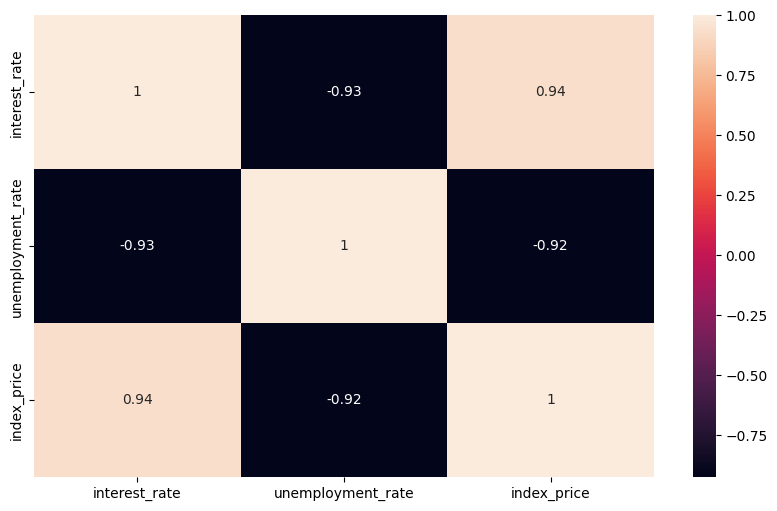

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [16]:
X = df[['interest_rate','unemployment_rate']]
y = df['index_price']

X
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train

array([[-0.89073374,  1.25707872],
       [ 1.35954097, -0.62853936],
       [ 1.35954097, -1.5713484 ],
       [-0.14064217,  0.62853936],
       [-0.89073374,  0.94280904],
       [ 1.35954097, -1.5713484 ],
       [ 1.35954097, -1.25707872],
       [-0.89073374,  1.25707872],
       [-0.89073374,  0.94280904],
       [-0.89073374,  0.31426968],
       [-0.89073374,  0.94280904],
       [ 0.6094494 , -0.94280904],
       [-0.14064217, -0.31426968],
       [-0.89073374,  0.        ],
       [-0.89073374,  0.94280904],
       [ 1.35954097, -0.94280904]])

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train,y_train)


LinearRegression()

In [22]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model,X_train,y_train,cv=3, scoring='neg_mean_squared_error')

print(np.mean(scores))

-8584.447029905592


In [23]:
y_pred = model.predict(X_test)
y_pred

array([1141.63549621,  787.98167849, 1339.94389614,  819.05076205,
        949.27404557, 1110.56641265,  881.18892917, 1271.85877973])

In [24]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

11792.511387420975
97.18750000000011
0.684817433917698


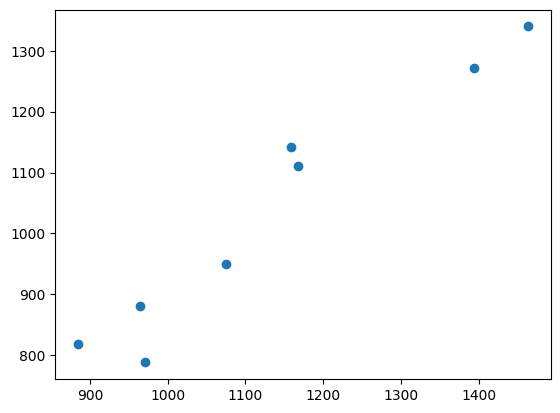

In [27]:
plt.scatter(y_test,y_pred)
plt.show()

/var/folders/ql/x5z6__c57kdbq_37w48p0g600000gn/T/ipykernel_1633/520176394.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


<Axes: xlabel='index_price', ylabel='Density'>

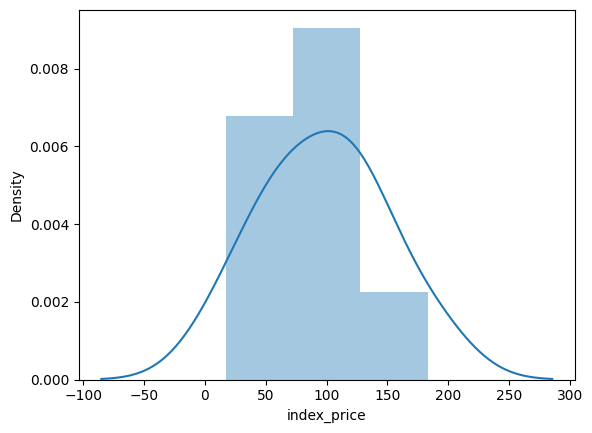

In [28]:
sns.distplot(y_test-y_pred)

In [29]:
# Predict new data

# interest_rate = 2.75
# unemployment_rate = 5.3

new_data = [[2.75,5.3]]

new_data = scaler.transform(new_data)

print(model.predict(new_data))


[1339.94389614]


/Users/mac/Desktop/MLOps/venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
